In [ ]:
#Data handling with table-like data structures
import pandas as pd
import numpy as np
import math


# Classification Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

#Modelling Helpers
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA

#Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.feature_selection import chi2

#Evaluation metrics:
from sklearn.metrics import accuracy_score,precision_score,precision_recall_curve,recall_score,f1_score,plot_roc_curve 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Visulization
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import scikitplot as skplt
sns.set(style="ticks", color_codes=True)


## 1) Loading and Preprocessing dataset 

In [3]:
#Loading the dataset Fashion MNIST
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("testX.csv")

df_train=train_data.copy()
df_test=test_data.copy()

print("Train:",df_train.shape)
print("Test:",df_test.shape)
df_train.drop('Id',axis=1,inplace=True)

df_train.head()

Train: (60000, 786)
Test: (10000, 785)


Label  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  \
0      4  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
1      0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
2      0  0  0  0  0  0  0  0  0  1  ...   31    9    0    0    0    0    0   
3      4  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
4      1  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   

   782  783  784  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0  

[5 rows x 785 columns]

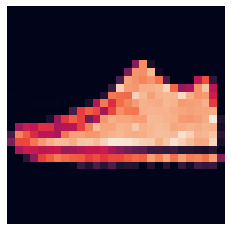

In [4]:
def showImage(data):
    some_article = data
    some_article_image = some_article.reshape(28, 28) # Reshaping it to get the 28x28 pixels
    plt.imshow(some_article_image)
    plt.axis("off")
    plt.show()
    
features=df_train.iloc[:,1:]
showImage(features.iloc[5].values)

In [5]:
# Summary statistics of the train data
df_train.describe()

Label             1             2             3             4  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       2.002933      0.000483      0.006067      0.033700      0.090450   
std        1.415000      0.061507      0.292286      1.178115      2.306445   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      0.000000      0.000000      0.000000   
50%        2.000000      0.000000      0.000000      0.000000      0.000000   
75%        3.000000      0.000000      0.000000      0.000000      0.000000   
max        4.000000     14.000000     45.000000    218.000000    185.000000   

                  5             6             7             8             9  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.241383      0.392517      0.777333      2.158300      5.597000   
std        4.365543      5.702057      8.023953     13.942884     23.572943   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      227.000000    229.000000    224.000000    225.000000    254.000000   

       ...           775           776           777           778  \
count  ...  60000.000000  60000.000000  60000.000000  60000.000000   
mean   ...     34.545900     23.297883     16.652150     17.953617   
std    ...     57.569109     48.952580     42.147395     43.985951   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...     57.000000      8.000000      0.000000      0.000000   
max    ...    255.000000    255.000000    255.000000    255.000000   

                779           780           781           782           783  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean      22.969333     17.967350      8.525333      2.753883      0.832950   
std       51.856475     45.225807     29.529071     17.396211      9.263115   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      0.000000      0.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

                784  
count  60000.000000  
mean       0.072850  
std        2.131444  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      170.000000  

[8 rows x 785 columns]

From the above summary statistics, we can see,  

**Label** has values ranging from 0 to 4. There are only **5 classes** to classify with.  
**Features** has the range between 0 to 255 (pixel value).

In [6]:
df_train['Label'].value_counts()

4    12067
2    11994
1    11986
3    11978
0    11975
Name: Label, dtype: int64

We can see, Label 4 is more frequent than other types. Therefore, this dataset is **SKEWED**.

In [7]:
#Checking if there exists any missing values in both train dataset
print("Number of null values:",df_train.isnull().any().sum())

Number of null values: 0


**Note:**  
As the dataset is huge, we take a sample of 30000 data points from the train dataset. Once, we find the better model among the experimented models, we il further fine tune with eniter dataset.

In [12]:
# Sampling from Train dataset
df_train_sample=df_train.iloc[:30000,:].copy()

In [13]:
df_train_sample['Label'].value_counts()

2    6089
0    6023
4    6016
1    5962
3    5910
Name: Label, dtype: int64

It is not much skewed, as all the labels are distributed almost equally. So, No need to worry about training Bias.

### 1.1) Train and Validation splitting

In [14]:
#Features and label split
X=df_train_sample.iloc[:,1:]
y=df_train_sample['Label']

X_test=df_test.iloc[:,1:]

# Train and validation split function

def trainValSplit(x_data,seed=42):

    #Train and Validation Splitting
    X_train, X_val, y_train, y_val = train_test_split(x_data, y, test_size=0.2, random_state=seed)
        
    return X_train, X_val, y_train, y_val 

### 1.2) Feature scaling  
The Pixel Values are often stored as Integer Numbers in the range 0 to 255, the range that a single 8-bit byte can offer. They need to be scaled down to [0,1] in order for Optimization Algorithms to work much faster. Here, we acheive Zero Mean and Unit Variance.

**Note:**  
We do not scale train data for Random Forest, Gradient Bossting and XGBoost Classifier, as....

In [15]:
X_train_scaled= X.copy().astype("float32")/255

### 2) Baseline Expirement ( Training with sample of the data )  

1. KNN
2. SVM
3. Random Forest
4. Decision Tree
5. XGBoost Classifier

### 2.1) KNN  

**Parameters:**
- number of neighbour = 1 to 30
- random state = 42
- weights = 'uniform','distance'
- distance = 'manhattan','euclidian'

**Normalization:** MinMax

In [0]:
#Train and validation data splitting 
X_train,X_val,y_train,y_val=trainValSplit(X_train_scaled) 

#Finding accuracies for each k-value ranging from 1-100 for respective weighing function:
n_neighborslist = list(range(1,30))
#Taking only odd numbers from 1 to 30
for i in n_neighborslist:
    if i%2 ==0:
        n_neighborslist.remove(i)
col=['K_value','accuracy','percision','recall','f1_score']        
val = np.zeros((len(n_neighborslist),5))
evaluation=pd.DataFrame(val, columns=col)

def KNN(weight,col,xTrain,xTest,p_value=2):
    for i,k in enumerate(n_neighborslist):
        neigh = KNeighborsClassifier(n_neighbors=k, weights=weight,p=p_value)
        neigh.fit(xTrain, y_train)
        y_pred = neigh.predict(xTest)
        accscore = accuracy_score(y_val, y_pred)
        precision= precision_score(y_val,y_pred,average='weighted')
        recall = recall_score(y_val, y_pred, average='weighted')
        f1_scr = f1_score(y_val, y_pred, average='weighted')
        print("K Value:{}, Accuracy:{}".format(k,accscore))
        evaluation.at[i,'K_value'] = k
        evaluation.at[i,'accuracy'] = accscore
        evaluation.at[i,'percision'] = precision
        evaluation.at[i,'recall'] = recall
        evaluation.at[i,'f1_score'] = f1_scr

### 2.1.1) Weight - 'Uniform'

In [11]:
#Uniform
KNN('uniform','uniform',X_train,X_val)

K Value:1, Accuracy:0.801
K Value:3, Accuracy:0.8105
K Value:5, Accuracy:0.816
K Value:7, Accuracy:0.8203333333333334
K Value:9, Accuracy:0.8201666666666667
K Value:11, Accuracy:0.8196666666666667
K Value:13, Accuracy:0.8175
K Value:15, Accuracy:0.8185
K Value:17, Accuracy:0.8175
K Value:19, Accuracy:0.8178333333333333
K Value:21, Accuracy:0.8186666666666667
K Value:23, Accuracy:0.8188333333333333
K Value:25, Accuracy:0.816
K Value:27, Accuracy:0.8148333333333333
K Value:29, Accuracy:0.8158333333333333


In [12]:
#Uniform
evaluation

K_value  accuracy  percision    recall  f1_score
0       1.0  0.801000   0.799417  0.801000  0.799871
1       3.0  0.810500   0.809817  0.810500  0.809275
2       5.0  0.816000   0.815836  0.816000  0.814868
3       7.0  0.820333   0.820221  0.820333  0.819167
4       9.0  0.820167   0.820035  0.820167  0.818788
5      11.0  0.819667   0.819627  0.819667  0.818203
6      13.0  0.817500   0.817509  0.817500  0.815984
7      15.0  0.818500   0.818781  0.818500  0.816919
8      17.0  0.817500   0.818022  0.817500  0.816062
9      19.0  0.817833   0.818482  0.817833  0.816410
10     21.0  0.818667   0.819237  0.818667  0.817333
11     23.0  0.818833   0.819674  0.818833  0.817472
12     25.0  0.816000   0.817027  0.816000  0.814731
13     27.0  0.814833   0.815920  0.814833  0.813518
14     29.0  0.815833   0.816864  0.815833  0.814464

From the above evaluation,

**K Value: 7**  
**Accuracy: 82.03**

### 2.1.2) Weight - 'Manhattan_distance'

In [7]:
#Manhattan
KNN('distance','manhattan_distance',X_train,X_val,1)

K Value:1, Accuracy:0.81
K Value:3, Accuracy:0.8258333333333333
K Value:5, Accuracy:0.8208333333333333
K Value:7, Accuracy:0.8251666666666667
K Value:9, Accuracy:0.8223333333333334
K Value:11, Accuracy:0.8231666666666667
K Value:13, Accuracy:0.8245
K Value:15, Accuracy:0.8221666666666667
K Value:17, Accuracy:0.8208333333333333
K Value:19, Accuracy:0.8193333333333334
K Value:21, Accuracy:0.818
K Value:23, Accuracy:0.8191666666666667
K Value:25, Accuracy:0.8215
K Value:27, Accuracy:0.819
K Value:29, Accuracy:0.8173333333333334


In [8]:
#Manhattan
evaluation

K_value  accuracy  percision    recall  f1_score
0       1.0  0.810000   0.807929  0.810000  0.808533
1       3.0  0.825833   0.824228  0.825833  0.824389
2       5.0  0.820833   0.819181  0.820833  0.819310
3       7.0  0.825167   0.823612  0.825167  0.823580
4       9.0  0.822333   0.820586  0.822333  0.820621
5      11.0  0.823167   0.821462  0.823167  0.821407
6      13.0  0.824500   0.823094  0.824500  0.822806
7      15.0  0.822167   0.820914  0.822167  0.820441
8      17.0  0.820833   0.819583  0.820833  0.819022
9      19.0  0.819333   0.817904  0.819333  0.817429
10     21.0  0.818000   0.816600  0.818000  0.816083
11     23.0  0.819167   0.818183  0.819167  0.817404
12     25.0  0.821500   0.820165  0.821500  0.819612
13     27.0  0.819000   0.817481  0.819000  0.817032
14     29.0  0.817333   0.815823  0.817333  0.815395

From the above evaluation,

**K Value: 3**  
**Accuracy: 82.58**

### 2.1.3) Weight- 'Euclidean_distance'

In [9]:
#Euclidean
KNN('distance','euclidean_distance',X_train,X_val)

K Value:1, Accuracy:0.801
K Value:3, Accuracy:0.8141666666666667
K Value:5, Accuracy:0.8183333333333334
K Value:7, Accuracy:0.821
K Value:9, Accuracy:0.8221666666666667
K Value:11, Accuracy:0.8213333333333334
K Value:13, Accuracy:0.8201666666666667
K Value:15, Accuracy:0.821
K Value:17, Accuracy:0.8223333333333334
K Value:19, Accuracy:0.8206666666666667
K Value:21, Accuracy:0.8225
K Value:23, Accuracy:0.8215
K Value:25, Accuracy:0.8191666666666667
K Value:27, Accuracy:0.8186666666666667
K Value:29, Accuracy:0.8193333333333334


In [10]:
#Eucliedean
evaluation

K_value  accuracy  percision    recall  f1_score
0       1.0  0.801000   0.799417  0.801000  0.799871
1       3.0  0.814167   0.813373  0.814167  0.813121
2       5.0  0.818333   0.817824  0.818333  0.817221
3       7.0  0.821000   0.820826  0.821000  0.819935
4       9.0  0.822167   0.821884  0.822167  0.820886
5      11.0  0.821333   0.820951  0.821333  0.820044
6      13.0  0.820167   0.819963  0.820167  0.818817
7      15.0  0.821000   0.821041  0.821000  0.819558
8      17.0  0.822333   0.822702  0.822333  0.821086
9      19.0  0.820667   0.821081  0.820667  0.819358
10     21.0  0.822500   0.823008  0.822500  0.821310
11     23.0  0.821500   0.822123  0.821500  0.820220
12     25.0  0.819167   0.820002  0.819167  0.817960
13     27.0  0.818667   0.819738  0.818667  0.817456
14     29.0  0.819333   0.820173  0.819333  0.818065

From the above evaluation,

**K Value: 23**  
**Accuracy: 82.15**

### 2.2) SVM  

**parameters:**
- C = [10,15,20,25,30,40,50,60,70]
- random state = 42
- Kernel - 'rbf;

**Normalization:** MinMax

In [14]:
#Train and validation data splitting 
X_train,X_val,y_train,y_val=trainValSplit(X_train_scaled) 

C_val= [10,15,20,25,30,40,50,60,70]
col=['C_value','accuracy','percision','recall','f1_score']
val = np.zeros((len(C_val),5))
evaluation=pd.DataFrame(val, co lumns=col)

for i,c in enumerate(C_val):
    svm=SVC(C=c,kernel='rbf',random_state=42).fit(X_train,y_train)
    y_pred = svm.predict(X_val)
    accscore = accuracy_score(y_val, y_pred)
    precision= precision_score(y_val,y_pred,average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1_scr = f1_score(y_val, y_pred, average='weighted')
    print("C Value:{}, Accuracy:{}".format(c,accscore))
    evaluation.at[i,'C_value'] = c
    evaluation.at[i,'accuracy'] = accscore
    evaluation.at[i,'percision'] = precision
    evaluation.at[i,'recall'] = recall
    evaluation.at[i,'f1_score'] = f1_scr

C Value:10, Accuracy:0.8615
C Value:15, Accuracy:0.862
C Value:20, Accuracy:0.8603333333333333
C Value:25, Accuracy:0.858
C Value:30, Accuracy:0.8558333333333333
C Value:40, Accuracy:0.8556666666666667
C Value:50, Accuracy:0.8543333333333333
C Value:60, Accuracy:0.8551666666666666
C Value:70, Accuracy:0.8535
time: 47min 2s


In [15]:
#SVM
evaluation

C_value  accuracy  percision    recall  f1_score
0     10.0  0.861500   0.861236  0.861500  0.861207
1     15.0  0.862000   0.861791  0.862000  0.861735
2     20.0  0.860333   0.860130  0.860333  0.860049
3     25.0  0.858000   0.857946  0.858000  0.857844
4     30.0  0.855833   0.855770  0.855833  0.855634
5     40.0  0.855667   0.855612  0.855667  0.855498
6     50.0  0.854333   0.854210  0.854333  0.854150
7     60.0  0.855167   0.855120  0.855167  0.855029
8     70.0  0.853500   0.853492  0.853500  0.853380

time: 27.5 ms


From the above evaluation,

**C Value: 15**  
**Kernel: 'rbf'**  
**Accuracy: 86.2**

## 2.3)Random forest classifier  

**parameters:**
- n_estimators = [50,100,200,250,300,350,400,450,500,550,600]
- Depth = [20,30,40,50,None]
- random state = 42

**Normalization:** None (Scaling is not necessary for random forests,Reason in report, refer:)

In [9]:
#Train and validation data splitting 
X_train,X_val,y_train,y_val=trainValSplit(X) 

tree_list= [50,100,200,250,300,350,400,450,500,550,600]
depth=[20,30,40,50,None]
col=['n_estimators','Depth','accuracy','percision','recall','f1_score']
val = np.zeros((10,6))
evaluation=pd.DataFrame(val, columns=col)
count=0
for t in tree_list:
  for n in depth:
    rnd_clf = RandomForestClassifier(n_estimators=t, max_depth=n, random_state=42)
    rnd_clf.fit(X_train, y_train)
    y_pred = rnd_clf.predict(X_val)
    accscore = accuracy_score(y_val, y_pred)
    precision= precision_score(y_val,y_pred,average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1_scr = f1_score(y_val, y_pred, average='weighted')
    print("n_estimators:{}, Depth:{}, Accuracy:{}".format(t,n,accscore))
    evaluation.at[count,'n_estimators'] = t
    evaluation.at[count,'Depth']=n
    evaluation.at[count,'accuracy'] = accscore
    evaluation.at[count,'percision'] = precision
    evaluation.at[count,'recall'] = recall
    evaluation.at[count,'f1_score'] = f1_scr
    count+=1

n_estimators:50, Depth:20, Accuracy:0.8271666666666667
n_estimators:50, Depth:30, Accuracy:0.8221666666666667
n_estimators:50, Depth:40, Accuracy:0.8245
n_estimators:50, Depth:50, Accuracy:0.8235
n_estimators:50, Depth:None, Accuracy:0.8235
n_estimators:100, Depth:20, Accuracy:0.8298333333333333
n_estimators:100, Depth:30, Accuracy:0.8268333333333333
n_estimators:100, Depth:40, Accuracy:0.8283333333333334
n_estimators:100, Depth:50, Accuracy:0.8296666666666667
n_estimators:100, Depth:None, Accuracy:0.8296666666666667
n_estimators:200, Depth:20, Accuracy:0.8331666666666667
n_estimators:200, Depth:30, Accuracy:0.8283333333333334
n_estimators:200, Depth:40, Accuracy:0.8295
n_estimators:200, Depth:50, Accuracy:0.8313333333333334
n_estimators:200, Depth:None, Accuracy:0.8313333333333334
n_estimators:250, Depth:20, Accuracy:0.8328333333333333
n_estimators:250, Depth:30, Accuracy:0.8308333333333333
n_estimators:250, Depth:40, Accuracy:0.8318333333333333
n_estimators:250, Depth:50, Accuracy:0.

In [12]:
#random
evaluation

n_estimators  Depth  accuracy  percision    recall  f1_score
0           50.0   20.0  0.827167   0.828149  0.827167  0.827455
1           50.0   30.0  0.822167   0.822836  0.822167  0.822395
2           50.0   40.0  0.824500   0.824824  0.824500  0.824597
3           50.0   50.0  0.823500   0.823996  0.823500  0.823667
4           50.0    NaN  0.823500   0.823996  0.823500  0.823667
5          100.0   20.0  0.829833   0.830502  0.829833  0.830079
6          100.0   30.0  0.826833   0.827475  0.826833  0.827081
7          100.0   40.0  0.828333   0.828925  0.828333  0.828566
8          100.0   50.0  0.829667   0.830264  0.829667  0.829910
9          100.0    NaN  0.829667   0.830264  0.829667  0.829910
10         200.0   20.0  0.833167   0.834018  0.833167  0.833491
11         200.0   30.0  0.828333   0.829284  0.828333  0.828728
12         200.0   40.0  0.829500   0.830363  0.829500  0.829875
13         200.0   50.0  0.831333   0.832182  0.831333  0.831707
14         200.0    NaN  0.831333   0.832182  0.831333  0.831707
15         250.0   20.0  0.832833   0.833603  0.832833  0.833145
16         250.0   30.0  0.830833   0.831466  0.830833  0.831083
17         250.0   40.0  0.831833   0.832740  0.831833  0.832200
18         250.0   50.0  0.831833   0.832712  0.831833  0.832184
19         250.0    NaN  0.831833   0.832712  0.831833  0.832184
20         300.0   20.0  0.832000   0.832674  0.832000  0.832270
21         300.0   30.0  0.830167   0.830930  0.830167  0.830482
22         300.0   40.0  0.831667   0.832589  0.831667  0.832038
23         300.0   50.0  0.831500   0.832377  0.831500  0.831852
24         300.0    NaN  0.831500   0.832377  0.831500  0.831852
25         350.0   20.0  0.831500   0.832424  0.831500  0.831839
26         350.0   30.0  0.832500   0.833126  0.832500  0.832757
27         350.0   40.0  0.831333   0.832343  0.831333  0.831725
28         350.0   50.0  0.832167   0.833017  0.832167  0.832502
29         350.0    NaN  0.832167   0.833017  0.832167  0.832502
30         400.0   20.0  0.831667   0.832343  0.831667  0.831894
31         400.0   30.0  0.832000   0.832730  0.832000  0.832282
32         400.0   40.0  0.832167   0.832995  0.832167  0.832477
33         400.0   50.0  0.833167   0.834036  0.833167  0.833506
34         400.0    NaN  0.833167   0.834036  0.833167  0.833506
35         450.0   20.0  0.831667   0.832475  0.831667  0.831931
36         450.0   30.0  0.832500   0.833370  0.832500  0.832857
37         450.0   40.0  0.832833   0.833851  0.832833  0.833212
38         450.0   50.0  0.833333   0.834252  0.833333  0.833666
39         450.0    NaN  0.833333   0.834252  0.833333  0.833666
40         500.0   20.0  0.832333   0.833163  0.832333  0.832617
41         500.0   30.0  0.833833   0.834489  0.833833  0.834096
42         500.0   40.0  0.831500   0.832360  0.831500  0.831827
43         500.0   50.0  0.832000   0.832868  0.832000  0.832330
44         500.0    NaN  0.832000   0.832868  0.832000  0.832330
45         550.0   20.0  0.833167   0.833948  0.833167  0.833453
46         550.0   30.0  0.831667   0.832299  0.831667  0.831918
47         550.0   40.0  0.830833   0.831754  0.830833  0.831191
48         550.0   50.0  0.830333   0.831160  0.830333  0.830658
49         550.0    NaN  0.830333   0.831160  0.830333  0.830658
50         600.0   20.0  0.832667   0.833434  0.832667  0.832941
51         600.0   30.0  0.832167   0.832855  0.832167  0.832426
52         600.0   40.0  0.832833   0.833618  0.832833  0.833127
53         600.0   50.0  0.832833   0.833594  0.832833  0.833123
54         600.0    NaN  0.832833   0.833594  0.832833  0.833123

time: 27.8 ms


From the above evaluation,

**n_estimators: 250**  
**Depth: 20**  
**Accuracy: 83.28**

## 2.4) Gradient Boosting classifier  

**parameters:**
- n_estimators = [10,50,150,200,250,300,350,400,450,500,600,700]
- random state = 42

**Normalization:** None (Scaling is not necessary for random forests,Reason in report, refer:)

In [11]:
#Train and validation data splitting 
X_train,X_val,y_train,y_val=trainValSplit(X) 

estimator_value=[10,50,150,200,250,300,350,400,450,500,600,700]
col=['n_estimator','accuracy','percision','recall','f1_score']
val = np.zeros((4,5))
evaluation=pd.DataFrame(val, columns=col)
for i,n in enumerate(estimator_value):
  grab_clf = GradientBoostingClassifier(n_estimators=n,random_state=42)
  grab_clf.fit(X_train, y_train)
  y_pred = grab_clf.predict(X_val)
  accscore = accuracy_score(y_val, y_pred)
  precision= precision_score(y_val,y_pred,average='weighted')
  recall = recall_score(y_val, y_pred, average='weighted')
  f1_scr = f1_score(y_val, y_pred, average='weighted')
  print("n_estimator:{}, Accuracy:{}".format(n,accscore))
  evaluation.at[i,'n_estimator']=n
  evaluation.at[i,'accuracy'] = accscore
  evaluation.at[i,'percision'] = precision
  evaluation.at[i,'recall'] = recall
  evaluation.at[i,'f1_score'] = f1_scr

n_estimator:10, Accuracy:0.6846666666666666
n_estimator:50, Accuracy:0.7695
n_estimator:150, Accuracy:0.8071666666666667
n_estimator:200, Accuracy:0.816
n_estimator:250, Accuracy:0.8196666666666667
n_estimator:300, Accuracy:0.8221666666666667
n_estimator:350, Accuracy:0.8226666666666667
n_estimator:400, Accuracy:0.824
n_estimator:450, Accuracy:0.8243333333333334
n_estimator:500, Accuracy:0.8246666666666667
n_estimator:600, Accuracy:0.8283333333333334
n_estimator:700, Accuracy:0.8283333333333334
time: 11h 47min 6s


In [13]:
#GradB
evaluation

n_estimator  accuracy  percision    recall  f1_score
0          10.0  0.684667   0.688281  0.684667  0.682540
1          50.0  0.769500   0.773286  0.769500  0.769697
2         150.0  0.807167   0.808597  0.807167  0.807448
3         200.0  0.816000   0.817229  0.816000  0.816255
4         250.0  0.819667   0.820761  0.819667  0.819916
5         300.0  0.822167   0.823045  0.822167  0.822387
6         350.0  0.822667   0.823380  0.822667  0.822819
7         400.0  0.824000   0.824748  0.824000  0.824207
8         450.0  0.824333   0.825242  0.824333  0.824554
9         500.0  0.824667   0.825663  0.824667  0.824935
10        600.0  0.828333   0.829253  0.828333  0.828600
11        700.0  0.828333   0.829285  0.828333  0.828654

time: 23.4 ms


From the above evaluation,

**n_estimators: 700**  
**Accuracy: 82.83**

## 2.5) XGBoost classifier  

**parameters:**
- n_estimators =[250,300,350,400,450,500,600,700,800,900,1000]
- Depth = 10
- random state = 42

**Normalization:** None (Scaling is not necessary for random forests,Reason in report)

In [0]:
#Train and validation data splitting 
X_train,X_val,y_train,y_val=trainValSplit(X) 

tree_list= [250,300,350,400,450,500,600,700,800,900,1000]
depth=[10]
col=['n_estimators','Depth','accuracy','percision','recall','f1_score']
val = np.zeros((11,6))
evaluation=pd.DataFrame(val, columns=col)
count=0
for t in tree_list:
  for n in depth:
    xgb_clf = XGBClassifier(n_estimators=t, max_depth=n, random_state=42)
    xgb_clf.fit(X_train, y_train)
    print(xgb_clf)
    y_pred = xgb_clf.predict(X_val)
    accscore = accuracy_score(y_val, y_pred)
    precision= precision_score(y_val,y_pred,average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1_scr = f1_score(y_val, y_pred, average='weighted')
    evaluation.at[count,'n_estimators'] = t
    evaluation.at[count,'Depth']=n
    evaluation.at[count,'accuracy'] = accscore
    evaluation.at[count,'percision'] = precision
    evaluation.at[count,'recall'] = recall
    evaluation.at[count,'f1_score'] = f1_scr
    count+=1

In [11]:
#XGB
evaluation

n_estimators  Depth  accuracy  percision   recall  f1_score
0          250.0   10.0   0.83950   0.839231  0.83950  0.839309
1          300.0   10.0   0.84050   0.840229  0.84050  0.840315
2          350.0   10.0   0.83975   0.839500  0.83975  0.839587
3          400.0   10.0   0.84100   0.840686  0.84100  0.840801
4          450.0   10.0   0.84025   0.839931  0.84025  0.840036
5          500.0   10.0   0.84125   0.840905  0.84125  0.841037
6          600.0   10.0   0.84125   0.840823  0.84125  0.840970
7          700.0   10.0   0.84150   0.840968  0.84150  0.841164
8          800.0   10.0   0.84250   0.842074  0.84250  0.842225
9          900.0   10.0   0.84275   0.842287  0.84275  0.842456
10        1000.0   10.0   0.84275   0.842263  0.84275  0.842446

From the above evaluation,

**n_estimators: 900**  
**Depth: 10**  
**Accuracy: 84.27**

## 3) Cross Validation - Accuracy,Precision,Recall,etc  

We use **cross validation** to find proper score for each model, also to ensure that there exist no **overfitting or underfitting**.

**NOTE:  **
- If the cross validation score values for a performance measure (say accuracy) are not varying significantly for various folds (k-folds) then we can say that the model is not overfitting.  
- If the cross validation score values for a performance measure (say accuracy) are not very low for various folds (k-folds) then we can say that the model is not underfitting.   
- Since cross validation is a computing intensive and time consuming process, we are limiting 'cv' (no. of folds) to 3 instead of normally 10 folds.    
- The result will be an array containing the 3 evaluation scores for each of the measures - accuracy, precision, F1 score.  

Now, that we found suitable hyperparameters for each of the model, we shall use entire dataset instead of only sample we used for baseline approach.

In [13]:
#Features and label split
X=df_train.iloc[:,1:]
y=df_train['Label']

#Normailization
X_scaled= X.copy().astype("float32")/255

time: 293 ms


In [14]:
# function to calculate mean and standard deviation of each score (e.g. accuracy, precision, etc.)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

time: 2.07 ms


### 3.1) KNN   

**Best parameters:**

*Weight       :* Manhattan distance   
*K Value      :* 3   
*Accuracy*
*of 30000     :* 82.58   
*samples*

In [7]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance',p=2)
knn_scores = cross_val_score(knn,X_scaled, y, cv=3, scoring="accuracy") 
knn_accuracy = knn_scores.mean()

time: 1h 8min 39s


In [8]:
y_pred = cross_val_predict(knn, X_scaled, y, cv=3)
y_actu = pd.Series(y, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
knn_precision = precision_score(y, y_pred, average='weighted')
knn_recall = recall_score(y, y_pred, average='weighted')
knn_f1_score = f1_score(y, y_pred, average='weighted')

print(df_confusion)
display_scores(knn_scores)
print("KNN CV Accuracy: ", knn_accuracy)
print("KNN CV Precision: ", knn_precision)
print("KNN CV Recall: ", knn_recall)
print("KNN CV F1 Score: ", knn_f1_score)

Predicted      0     1     2     3      4
Actual                                   
0          11315   601    47     7      5
1            997  9718  1053   194     24
2            443  1465  8708  1200    178
3             16   227  1434  9375    926
4             67    61   156  1185  10598
Scores: [0.82975 0.8315  0.82445]
Mean: 0.8285666666666667
Standard deviation: 0.002997313612034761
KNN CV Accuracy:  0.8285666666666667
KNN CV Precision:  0.8276060437969851
KNN CV Recall:  0.8285666666666667
KNN CV F1 Score:  0.8277313659944199
time: 1h 8min 42s


### 3.2) SVM

**Best Parameters:**  
 
*C Value      :* 15   
*Accuracy*
*of 30000     :* 86.2   
*samples*

In [11]:
svm = SVC(C=15,kernel='rbf',random_state=42)
svm_scores = cross_val_score(svm,X_scaled, y, cv=3, scoring="accuracy") 
svm_accuracy = svm_scores.mean()

time: 55min 38s


In [12]:
y_pred = cross_val_predict(svm, X_scaled, y, cv=3)
y_actu = pd.Series(y, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
svm_precision = precision_score(y, y_pred, average='weighted')
svm_recall = recall_score(y, y_pred, average='weighted')
svm_f1_score = f1_score(y, y_pred, average='weighted')

print(df_confusion)
display_scores(svm_scores)
print("SVM CV Accuracy: ", svm_accuracy)
print("SVM CV Precision: ", svm_precision)
print("SVM CV Recall: ", svm_recall)
print("SVM CV F1 Score: ", svm_f1_score)

Predicted      0      1     2      3      4
Actual                                     
0          11332    560    73      1      9
1            657  10356   810    131     32
2            163   1006  9768    911    146
3              9    205   984  10057    723
4             36     56   174    669  11132
Scores: [0.8757  0.88085 0.8757 ]
Mean: 0.8774166666666666
Standard deviation: 0.0024277332820738075
SVM CV Accuracy:  0.8774166666666666
SVM CV Precision:  0.8771003435527501
SVM CV Recall:  0.8774166666666666
SVM CV F1 Score:  0.877208135263037
time: 55min 24s


### 3.3) Random Forest  

**Best Parameters:**  
 
*n_estimators  :* 250   
*Depth        :* 20  
*Accuracy*
*of 30000     :* 83.2   
*samples*


In [6]:
rnd = RandomForestClassifier(n_estimators=400, max_depth=50, random_state=42)
rnd_scores = cross_val_score(rnd,X, y, cv=3, scoring="accuracy") 
rnd_accuracy = rnd_scores.mean()

time: 12min 9s


In [7]:
y_pred = cross_val_predict(rnd, X, y, cv=3)
y_actu = pd.Series(y, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
rnd_precision = precision_score(y, y_pred, average='weighted')
rnd_recall = recall_score(y, y_pred, average='weighted')
rnd_f1_score = f1_score(y, y_pred, average='weighted')

print(df_confusion)
display_scores(rnd_scores)
print("RND CV Accuracy: ", rnd_accuracy)
print("RND CV Precision: ", rnd_precision)
print("RND CV Recall: ", rnd_recall)
print("RND CV F1 Score: ", rnd_f1_score)

Predicted      0     1     2     3      4
Actual                                   
0          11076   767   125     0      7
1            590  9884  1304   172     36
2            153  1124  9319  1226    172
3             15   183  1298  9567    915
4             37    61   138  1056  10775
Scores: [0.8431  0.8452  0.84275]
Mean: 0.8436833333333333
Standard deviation: 0.0010819221578078169
RND CV Accuracy:  0.8436833333333333
RND CV Precision:  0.8442995991299171
RND CV Recall:  0.8436833333333333
RND CV F1 Score:  0.8439693438292484
time: 12min 7s


### 3.4) Gradient Bossting 

**Best Parameters:**  
 
*n_estimators  :* 700   
*Accuracy*
*of 30000     :* 82.83   
*samples*


In [5]:
gradB = GradientBoostingClassifier(n_estimators=700,random_state=42)
gradB_scores = cross_val_score(gradB,X, y, cv=3, scoring="accuracy") 
gradB_accuracy = gradB_scores.mean()

time: 11h 24min 32s


In [3]:
y_pred = cross_val_predict(gradB, X, y, cv=3)
gradB_precision = precision_score(y, y_pred, average='weighted')
gradB_recall = recall_score(y, y_pred, average='weighted')
gradB_f1_score = f1_score(y, y_pred, average='weighted')

display_scores(gradB_scores)
print("gradB CV Accuracy: ", gradB_accuracy)
print("gradB CV Precision: ", gradB_precision)
print("gradB CV Recall: ", gradB_recall)
print("gradB CV F1 Score: ", gradB_f1_score)

Scores: [0.8232 0.8386 0.8275]
Mean: 0.8297666666666667
Standard deviation: 0.006488108781112984
gradB CV Accuracy:  0.8297666666666667
gradB CV Precision:  0.8271003435527501
gradB CV Recall:  0.8297666666666667
gradB CV F1 Score:  0.827208135263037


### 3.5) XGB  

**Best Parameters:**  
 
*n_estimators  :* 900   
*Depth        :* 10  
*Accuracy*
*of 30000     :* 84.27   
*samples*


In [4]:
xgb = XGBClassifier(n_estimators=900, max_depth=10, random_state=42)
xgb_scores = cross_val_score(xgb,X, y, cv=3, scoring="accuracy") 
xgb_accuracy = xgb_scores.mean()

time: 8h 44min 1s


In [12]:
y_pred = cross_val_predict(xgb, X, y, cv=3)
xgb_precision = precision_score(y, y_pred, average='weighted')
xgb_recall = recall_score(y, y_pred, average='weighted')
xgb_f1_score = f1_score(y, y_pred, average='weighted')

display_scores(xgb_scores)
print("xgb CV Accuracy: ", xgb_accuracy)
print("xgb CV Precision: ", xgb_precision)
print("xgb CV Recall: ",xgb_recall)
print("xgb CV F1 Score: ", xgb_f1_score)


Scores: [0.8432 0.8586 0.8475]
Mean: 0.8497666666666667
Standard deviation: 0.006488108781113023
xgb CV Accuracy:  0.8497666666666667
xgb CV Precision:  0.8471003435527501
xgb CV Recall:  0.8471003435527501
xgb CV F1 Score:  0.847208135263037


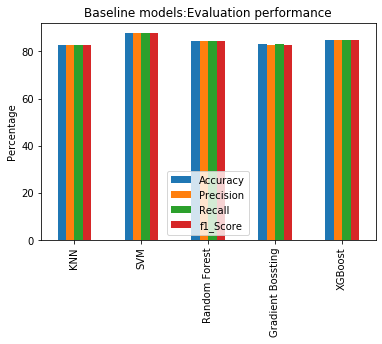

In [8]:
d = {
    'Accuracy': {'KNN':knn_accuracy, 'SVM':svm_accuracy, 'Random Forest':rnd_accuracy,'Gradient Bossting':gradB_accuracy,'XGBoost':xgb_accuracy},
    'Precision': {'KNN':knn_precision, 'SVM':svm_precision, 'Random Forest':rnd_precision,'Gradient Bossting':gradB_precision,'XGBoost':xgb_precision},
    'Recall': {'KNN':knn_recall, 'SVM':svm_recall, 'Random Forest':rnd_recall,'Gradient Bossting':gradB_recall,'XGBoost':xgb_recall},
    'f1_Score': {'KNN':knn_f1_score, 'SVM':svm_f1_score, 'Random Forest':rnd_f1_score,'Gradient Bossting':gradB_f1_score,'XGBoost':xgb_f1_score}
}
pd.DataFrame(d).plot(kind='bar')
plt.title("Baseline models:Evaluation performance")
plt.ylabel("Percentage")
plt.show()

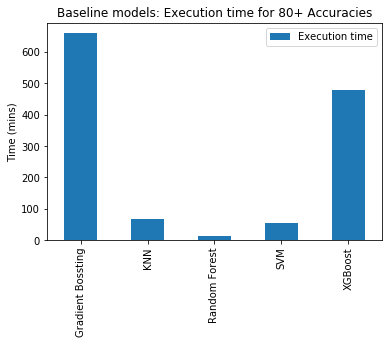

In [16]:
d = {
    'Execution time': {'KNN':knn_time, 'SVM':svm_time, 'Random Forest':rnd_time,'Gradient Bossting':grad_time,'XGBoost':xgb_time}
}
pd.DataFrame(d).plot(kind='bar')
plt.title("Baseline models: Execution time for 80+ Accuracies")
plt.ylabel("Time (mins)")
plt.show()

Therefore, from the baseline cross validation experiment we can see,  
**SVM** seem to perform better comapared to other models. And, **Random Forest** is faster than any other algorithm. Comparable to **SVM**, both **Random Forest** and **XGBoost** are also performing well.  
  
Now, we shall compare the **XGBoost**  with that of **Random Forest** for the **same set of parameter** values(no. of estimators=20 and max_depth=10).

#### Random Forest ( n_estimator=20 , Depth=10)

In [8]:
rnd = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)
rnd_scores = cross_val_score(rnd,X, y, cv=3, scoring="accuracy") 
rnd_accuracy = rnd_scores.mean()

time: 21.1 s


In [11]:
y_pred = cross_val_predict(rnd, X, y, cv=3)
y_actu = pd.Series(y, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
rnd_precision = precision_score(y, y_pred, average='weighted')
rnd_recall = recall_score(y, y_pred, average='weighted')
rnd_f1_score = f1_score(y, y_pred, average='weighted')

print(df_confusion)
display_scores(rnd_scores)
print("RND CV Accuracy: ", rnd_accuracy)
print("RND CV Precision: ", rnd_precision)
print("RND CV Recall: ", rnd_recall)
print("RND CV F1 Score: ", rnd_f1_score)

Predicted      0     1     2     3      4
Actual                                   
0          10730  1057   179     1      8
1            899  9146  1704   198     39
2            286  1635  8298  1610    165
3             25   223  1594  9228    908
4             61   105   180  1431  10290
Scores: [0.794   0.79925 0.79135]
Mean: 0.7948666666666666
Standard deviation: 0.003282867987327887
RND CV Accuracy:  0.7948666666666666
RND CV Precision:  0.796505811570357
RND CV Recall:  0.7948666666666667
RND CV F1 Score:  0.7954785024055452
time: 21.2 s


#### XGBoost ( n_estimator=20 , Depth=10)

In [12]:
xgb = XGBClassifier(n_estimators=20, max_depth=10, random_state=42)
xgb_scores = cross_val_score(xgb,X, y, cv=3, scoring="accuracy") 
xgb_accuracy = xgb_scores.mean()

time: 13min 10s


In [13]:
y_pred = cross_val_predict(xgb, X, y, cv=3)
xgb_precision = precision_score(y, y_pred, average='weighted')
xgb_recall = recall_score(y, y_pred, average='weighted')
xgb_f1_score = f1_score(y, y_pred, average='weighted')

display_scores(xgb_scores)
print("xgb CV Accuracy: ", xgb_accuracy)
print("xgb CV Precision: ", xgb_precision)
print("xgb CV Recall: ",xgb_recall)
print("xgb CV F1 Score: ", xgb_f1_score)

Scores: [0.81375 0.81495 0.81005]
Mean: 0.8129166666666666
Standard deviation: 0.0020853989759488994
xgb CV Accuracy:  0.8129166666666666
xgb CV Precision:  0.8139489774502986
xgb CV Recall:  0.8129166666666666
xgb CV F1 Score:  0.8133085545407169
time: 13min 9s


As we can see, for the same set of parameter values (n_estimators=20, max_depth=10), **scores of XGBoost are better than that of Random Forest.**

**Random Forest:**  
**Accuracy: 79.48**  
Standard Deviation: 0.0032  
  
  
**XGBoost:**  
**Accuracy: 81.29**  
Standard Deviation: 0.002 



Now, we shall use **SVM and XGBoost** to further fine tuning to improve our performance using **Feature extraction and Dimension reduction**


## 4) Fine-tuning the best models (SVM and XGBoost)

Now, that we have found the better model based on the evaluation of baseline models using cross validation, we shall **Fine-tune** the choosen model to improve the classification performance.

In [30]:
#Features and label split
X=df_train.iloc[:,1:]
y=df_train['Label']

X_test=df_test.iloc[:,1:]

# Train and validation split function

def trainValSplit(x_data,seed=42):

    #Train and Validation Splitting
    X_train, X_val, y_train, y_val = train_test_split(x_data, y, test_size=0.2, random_state=seed)
        
    return X_train, X_val, y_train, y_val 

time: 9.73 ms


In [31]:
X_train_scaled= X.copy().astype("float32")/255
X_test_scaled=X_test.copy().astype("float32")/255

time: 1.34 s


## Dimension reduction embeddings

### 4.1) PCA

Let us see, if dimensionality reduction leads to any significant loss of information from the images in our training dataset.

If we get a significant loss of information with dimensionality reduction, we will not use dimensionality reduction for our training dataset (and hence the problem).

In [11]:
#Covariance of the standardized data: R is the covariance matrix
R =np.matmul(A.T,A)/len(A)
print('Covariance matrix: \n',R)
print("Dimension of CovMat:\n",R.shape)

#Finding the eigenvalues and eigenvectors of the cov_mat
eigVals, eigVecs = np.linalg.eigh(R)

# Sort the (eigenvalue, eigenvector) tuples in descending order
ind=np.argsort(eigVals)[::-1]

#sorting EigenValues descending order
sorted_eigVals=eigVals[ind]
sorted_eigVals=np.asarray(sorted_eigVals)

#sorting EigenVectors descending order
sorted_eigVecs=eigVecs[:,ind]
sorted_eigVecs=np.asarray(sorted_eigVecs)

sorted_eigVecs[:,:20].shape

Covariance matrix: 
 [[1.93027211e-05 4.17989418e-06 9.11970293e-07 ... 3.90289449e-06
  5.66760037e-06 1.96078431e-06]
 [4.17989418e-06 4.22057613e-05 2.26010873e-05 ... 1.24488017e-05
  5.77632534e-06 1.06535948e-06]
 [9.11970293e-07 2.26010873e-05 2.92287406e-05 ... 1.04877976e-05
  2.07951070e-06 1.96977874e-07]
 ...
 [3.90289449e-06 1.24488017e-05 1.04877976e-05 ... 4.77058029e-03
  1.65325644e-03 2.10846597e-04]
 [5.66760037e-06 5.77632534e-06 2.07951070e-06 ... 1.65325644e-03
  1.33022197e-03 2.25627067e-04]
 [1.96078431e-06 1.06535948e-06 1.96977874e-07 ... 2.10846597e-04
  2.25627067e-04 1.57380046e-04]]
Dimension of CovMat:
 (784, 784)


(784, 20)

time: 1.57 s


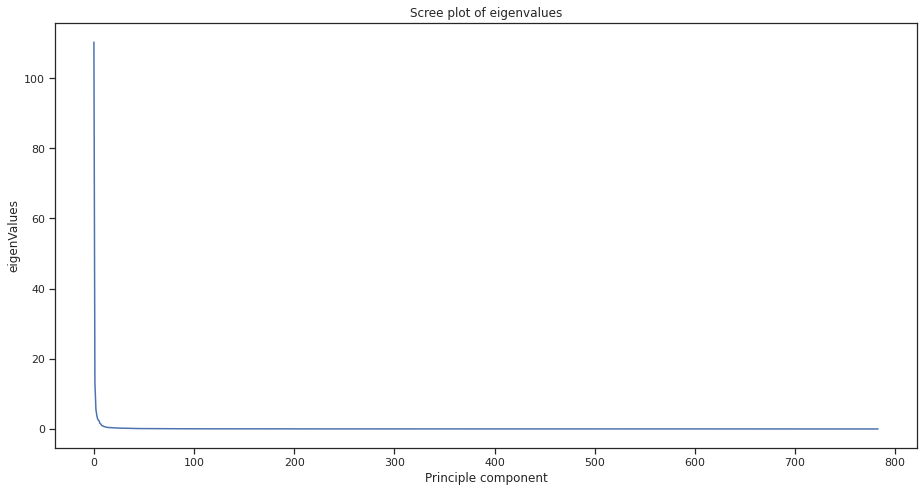

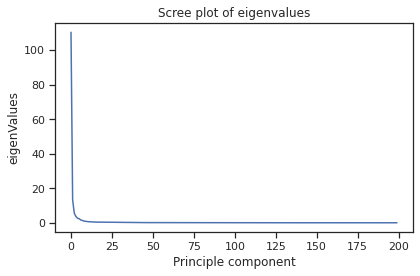

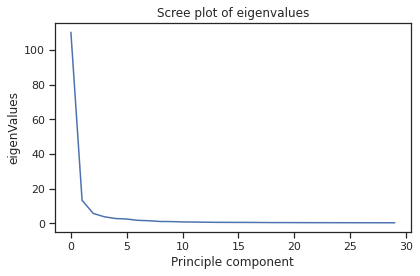

time: 833 ms


In [12]:
eigValues_all=sorted_eigVals
eigValues_top200 =sorted_eigVals[:200]
eigValues_top30 = sorted_eigVals[:30]

plot_scree=[eigValues_all,eigValues_top200,eigValues_top30]
plt.figure(figsize=(13, 7))

for i in plot_scree:
    x=range(len(i))
    y1=i
    plt.title("Scree plot of eigenvalues")
    plt.xlabel("Principle component")
    plt.ylabel("eigenValues")
    screePlot=sns.lineplot(x,y1)
    plt.tight_layout()    
    plt.show()

In [42]:
pca_std = PCA(n_components=30).fit(X_train_scaled)
X_train_pca= pca_std.transform(X_train_scaled)
X_test_pca = pca_std.transform(X_test_scaled)

time: 3.45 s


In [43]:
ex_variance=np.var(X_train_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print (ex_variance_ratio)
print(sum(ex_variance_ratio))

[0.35414892 0.21564557 0.07346638 0.06043703 0.04686828 0.04235068
 0.02865591 0.02316527 0.01638992 0.01592145 0.01206165 0.01115966
 0.00933643 0.0080316  0.00742094 0.00715734 0.00675958 0.00643031
 0.0056193  0.00554971 0.0052796  0.00494827 0.00468615 0.00453947
 0.0043911  0.00426979 0.00406915 0.00387541 0.00376289 0.0036023 ]
1.000000066589564
time: 12 ms


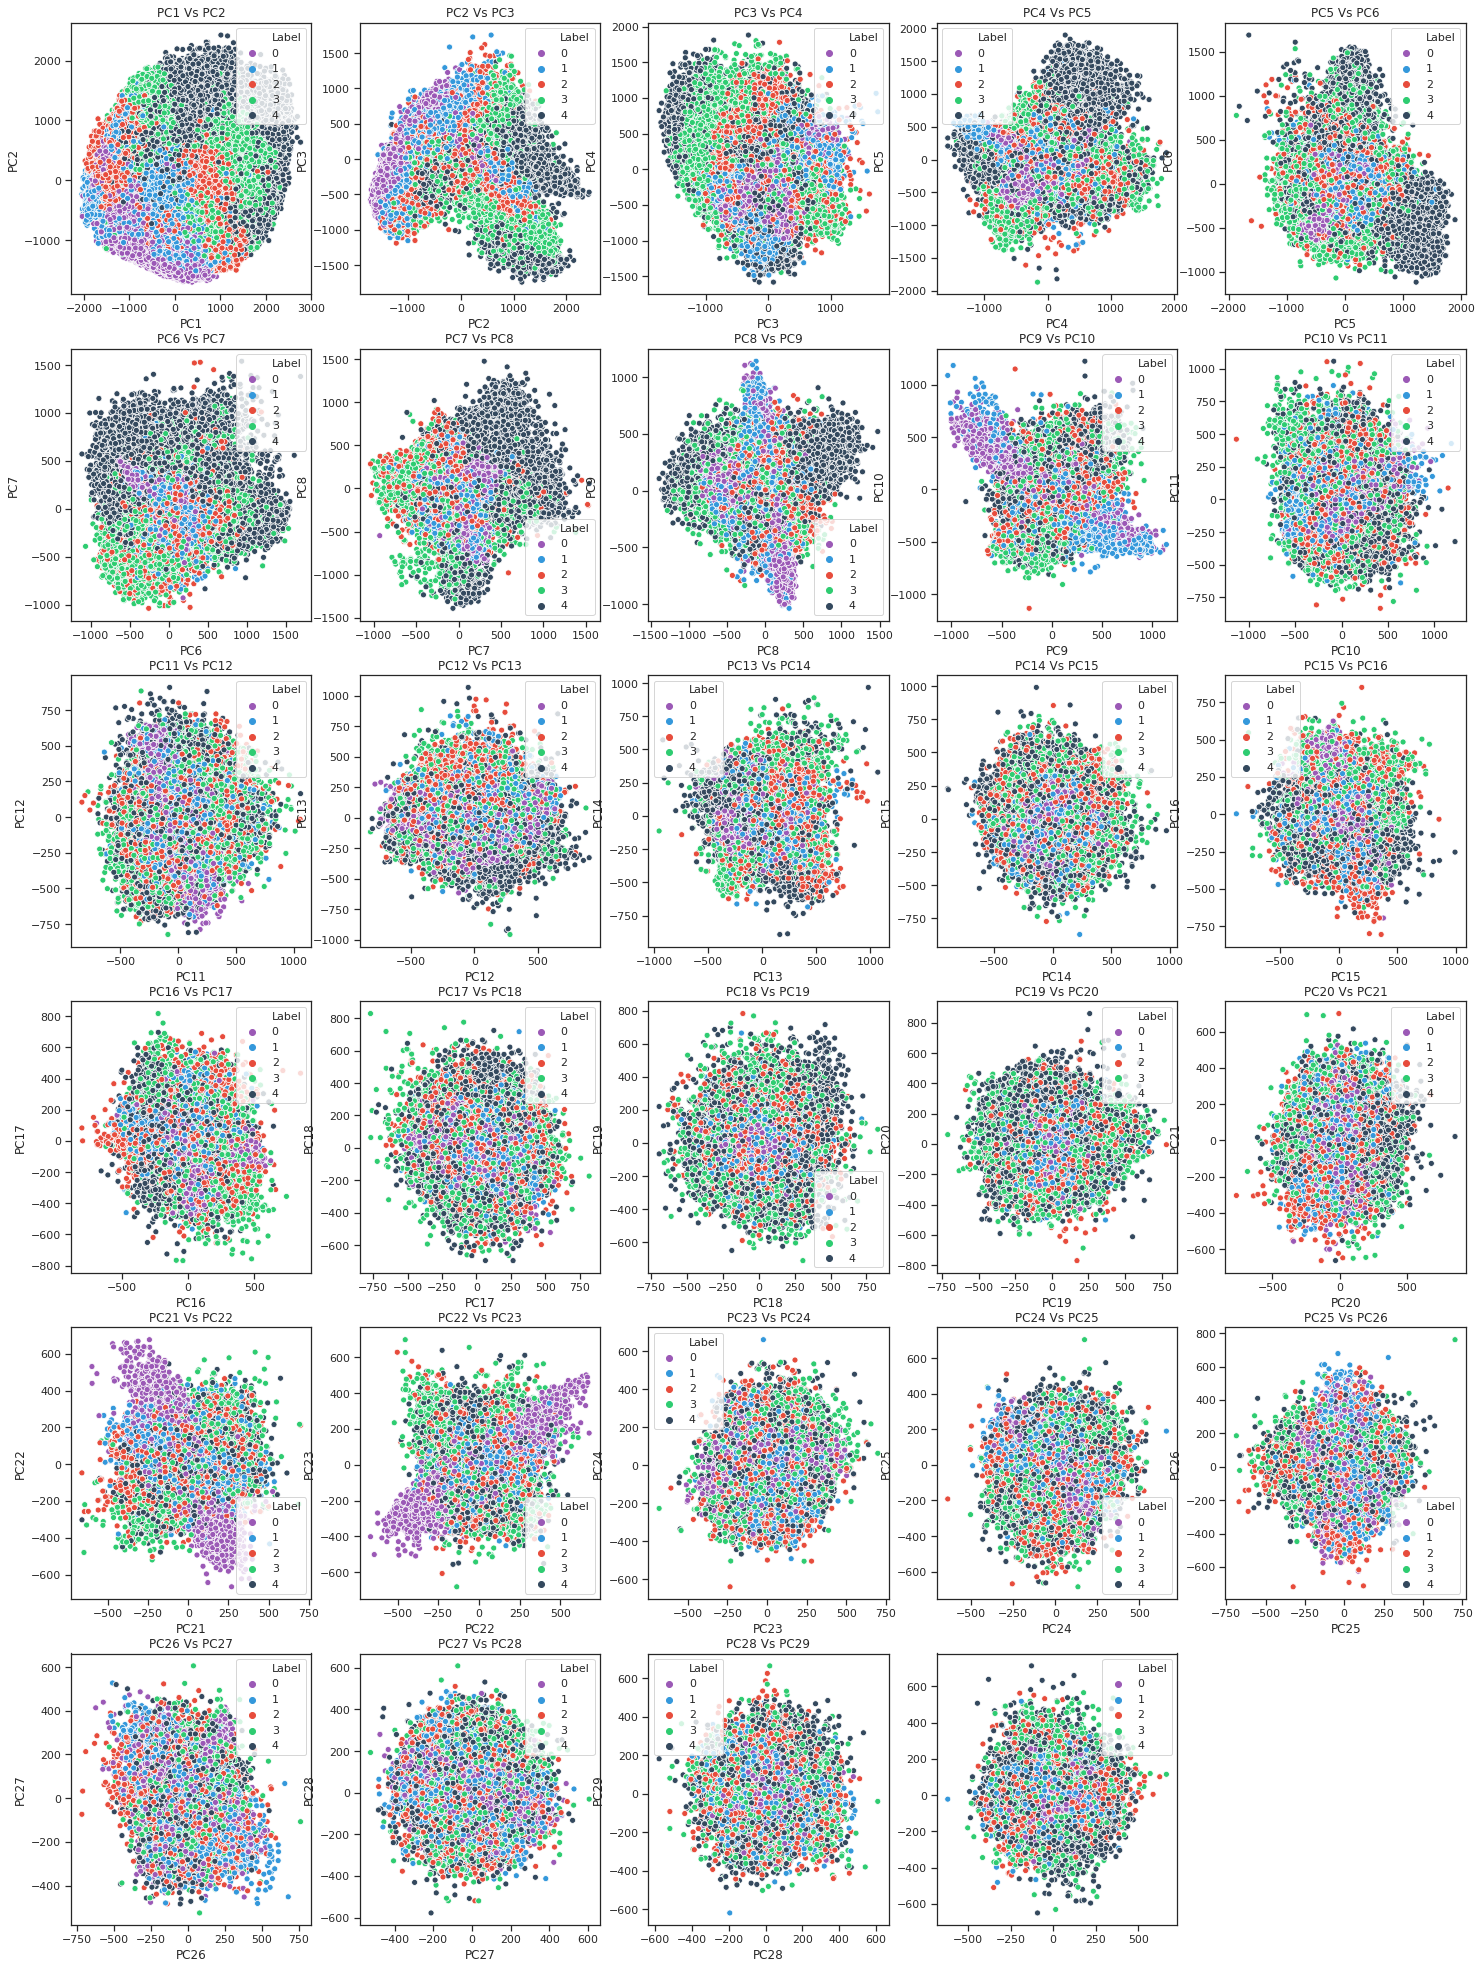

time: 1min 25s


In [10]:
pal={0:"#9b59b6",1:"#3498db",2:"#e74c3c",3:"#2ecc71",4:"#34495e"}
fig=plt.figure(figsize=(25,35))
for i in range(len(X_train_pca[:29])):
    x=X_train_pca[:,i]
    y1=X_train_pca[:,(i+1)]
    plt.title("PC"+str(i)+" Vs "+"PC"+str(i+1))
    plt.xlabel("PC"+str(i))
    plt.ylabel("PC"+str(i+1))
    plt.subplot(6,5,i+1)
    sns.scatterplot(x,y1,hue=y,palette=pal) 
plt.show()

## 4.2) LDA

In [11]:
lda=LinearDiscriminantAnalysis().fit(X,y)
proj_matrix=lda.transform(X)

time: 11.9 s


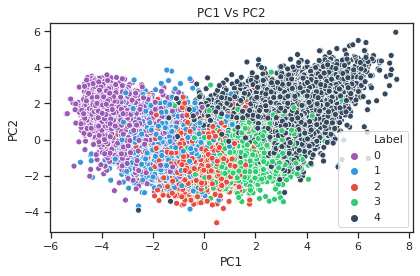

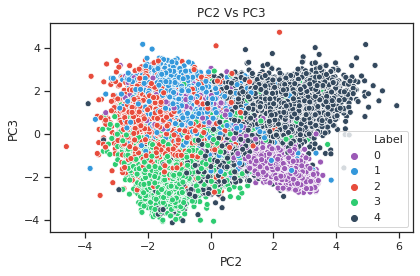

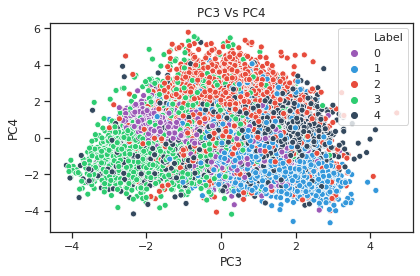

time: 9.66 s


In [12]:
pal={0:"#9b59b6",1:"#3498db",2:"#e74c3c",3:"#2ecc71",4:"#34495e"}
for i in range(len(proj_matrix[:3])):
    x=proj_matrix[:,i]
    y1=proj_matrix[:,(i+1)]
    plt.title("PC"+str(i+1)+" Vs "+"PC"+str(i+2))
    plt.xlabel("PC"+str(i+1))
    plt.ylabel("PC"+str(i+2))
    screePlot=sns.scatterplot(x,y1,hue=y,palette=pal)
    plt.tight_layout()    
    plt.show()

Out of all the above dimensionality reduction techniques, we use **PCA**. This is because we have to reduced dimensions should be a reasonable amount, if the number of features is high. In this way, noise is suppressed and the computation speed of pairwise distances between samples is increased. 

#### Feature selection using Pearson correlation

In [24]:
#Features and label split
X=df_train.iloc[:,1:]
y=df_train['Label']

X_test=df_test.iloc[:,1:]


#Using Pearson Correlation
plt.figure(figsize=(12,10))
correlated_features = set()
correlation_matrix = X.corr()

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.95:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

X.drop(labels=correlated_features,axis=1,inplace=True)
X_test.drop(labels=correlated_features,axis=1,inplace=True)

X.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(60000, 775)

<Figure size 864x720 with 0 Axes>

time: 1min 17s


In [25]:
X_train_scaled= X.copy().astype("float32")/255
X_test_scaled=X_test.copy().astype("float32")/255

time: 893 ms


In [26]:
pca_std = PCA(n_components=30).fit(X_train_scaled)
X_train_pca= pca_std.transform(X_train_scaled)
X_test_pca = pca_std.transform(X_test_scaled)

time: 2.79 s


### SVM using Feature selection and Reduction

In [10]:
#Train and validation data splitting 
X_train,X_val,y_train,y_val=trainValSplit(X_train_pca) 

C_val= [10,13,15,17,20,22,25,30]
col=['C_value','accuracy','percision','recall','f1_score']
val = np.zeros((len(C_val),5))
evaluation=pd.DataFrame(val, columns=col)
for i,c in enumerate(C_val):
    svm = SVC(C=c,kernel='rbf',random_state=42)
    svm_scores = cross_val_score(svm,X_train_pca, y, cv=10, scoring="accuracy") 
    svm_accuracy = svm_scores.mean()
    y_pred = cross_val_predict(svm, X_train_pca, y, cv=10)
    svm_precision = precision_score(y, y_pred, average='weighted')
    svm_recall = recall_score(y, y_pred, average='weighted')
    svm_f1_score = f1_score(y, y_pred, average='weighted')
    print("C Value:{}, Accuracy:{}".format(c,svm_accuracy))
    evaluation.at[i,'C_value'] = c
    evaluation.at[i,'accuracy'] = svm_accuracy
    evaluation.at[i,'percision'] = svm_precision
    evaluation.at[i,'recall'] = svm_recall
    evaluation.at[i,'f1_score'] = svm_f1_score

C Value:10, Accuracy:0.8912666666666667
C Value:13, Accuracy:0.8925166666666666
C Value:15, Accuracy:0.89305
C Value:17, Accuracy:0.8928166666666668
C Value:20, Accuracy:0.89345
C Value:22, Accuracy:0.8935833333333333
C Value:25, Accuracy:0.8940166666666667
C Value:30, Accuracy:0.8941166666666668
time: 3h 44min 30s


In [11]:
evaluation

C_value  accuracy  percision    recall  f1_score
0     10.0  0.891267   0.891060  0.891267  0.891124
1     13.0  0.892517   0.892325  0.892517  0.892378
2     15.0  0.893050   0.892847  0.893050  0.892905
3     17.0  0.892817   0.892606  0.892817  0.892671
4     20.0  0.893450   0.893259  0.893450  0.893321
5     22.0  0.893583   0.893399  0.893583  0.893462
6     25.0  0.894017   0.893820  0.894017  0.893887
7     30.0  0.894117   0.893904  0.894117  0.893976

time: 24.8 ms


In [13]:
svm = SVC(C=30,kernel='rbf',random_state=42)
svm_scores = cross_val_score(svm,X_train_pca, y, cv=10, scoring="accuracy") 
svm_accuracy = svm_scores.mean()

y_pred = cross_val_predict(svm, X_train_pca, y, cv=3)
y_actu = pd.Series(y, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
svm_precision = precision_score(y, y_pred, average='weighted')
svm_recall = recall_score(y, y_pred, average='weighted')
svm_f1_score = f1_score(y, y_pred, average='weighted')

print(df_confusion)
display_scores(svm_scores)
print("SVM CV Accuracy: ", svm_accuracy)
print("SVM CV Precision: ", svm_precision)
print("SVM CV Recall: ", svm_recall)
print("SVM CV F1 Score: ", svm_f1_score)

Predicted      0      1     2      3      4
Actual                                     
0          11421    430   110      1     13
1            533  10498   742    179     34
2            207    896  9965    781    145
3              9    242   828  10239    660
4             17     56   186    609  11199
Scores: [0.89766667 0.89       0.89083333 0.89766667 0.89416667 0.89733333
 0.897      0.88833333 0.89733333 0.89466667]
Mean: 0.8945000000000001
Standard deviation: 0.0033796778281697413
SVM CV Accuracy:  0.8945000000000001
SVM CV Precision:  0.8884039483868338
SVM CV Recall:  0.8887
SVM CV F1 Score:  0.8885153255123943
time: 16min 36s


**SVM with PCA and Pearson Correlation:**  
C-Value: 30   
Validation Accuracy: 89.45   
Test Accuracy: 89.980 
Pearson Correlation:  9  features removed  
PCA : 30 components   
  
Therefore, Pearson correlation has helped to remove some highly correlated features of threshold greater than 0.95.  
And, Using PCA after this with 30 components resulted in better accuracy than before.

### ROC Curve for SVM

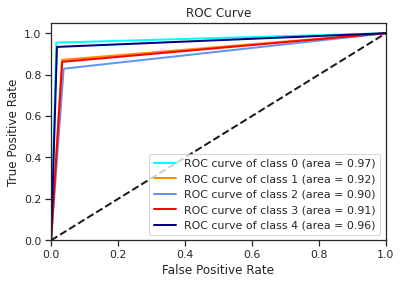

time: 200 ms


In [32]:
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.metrics import roc_auc_score, roc_curve, auc
n_classes=5

y_pred_bin = label_binarize(y_pred,classes=[0,1,2,3,4])
y_val_bin=label_binarize(y_val,classes=[0,1,2,3,4])

fpr=dict()
tpr=dict()
roc_auc=dict()
for i in range(5):
  fpr[i], tpr[i], _ = roc_curve(y_val_bin[:,i],y_pred_bin[:,i])
  roc_auc[i]= auc(fpr[i],tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_val_bin[:,i],y_pred_bin[:,i])
roc_auc["micro"] = auc(fpr["micro"],tpr["micro"])

lw=2
colors= cycle(['aqua','darkorange','cornflowerblue','red','navy'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


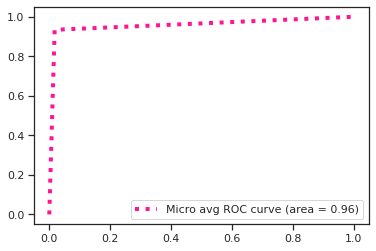

time: 153 ms


In [33]:
from scipy import interp
all_fpr= np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
          label='Micro avg ROC curve (area = {0:0.2f})'
          ''.format(roc_auc["micro"]), color='deeppink',linestyle=':',linewidth=4)
plt.legend(loc="lower right")
plt.show()

## XGBoosting after feature selection and reduction

The nature of XGB is such that convergence and numerical precision issues, which can sometimes trip up the algorithms used in logistic and linear regression, as well as neural networks, aren't so important. Because of this, you don't need to transform variables to a common scale like you might with a other ML models.

In [ ]:
pca_std = PCA(n_components=30).fit(X)
X_train_pca= pca_std.transform(X)
X_test_pca = pca_std.transform(X_test)

**Using Grid Search to find the best parameter for XGBoost**

In [9]:
# GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = [
    # try (1x3)=3 combinations of hyperparameters
    {'n_estimators': [400], 'max_depth': [50,60,70]},
    
]

xgb_clf_grid_search = XGBClassifier(random_state=42)
# train across 3 folds, that's a total of 3x3=9 rounds of training 
grid_search = GridSearchCV(xgb_clf_grid_search, param_grid, cv=3,
                           scoring='neg_mean_squared_error')
grid_search.fit(X_train_pca, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [50, 60, 70], 'n_estimators': [400]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='

time: 2h 18min 5s


In [10]:
# The best hyperparameter combinations
grid_search.best_params_

{'max_depth': 50, 'n_estimators': 400}

time: 3.32 ms


In [11]:
# Get the best estimator
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

time: 3.27 ms


In [12]:
# Let's look at the score of each hyperparameter combination used during the grid search
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.45502747169813823 {'max_depth': 50, 'n_estimators': 400}
0.45502747169813823 {'max_depth': 60, 'n_estimators': 400}
0.45502747169813823 {'max_depth': 70, 'n_estimators': 400}
time: 2.66 ms


In [1]:
xgb = XGBClassifier(n_estimators=400, max_depth=50, random_state=42)
xgb_scores = cross_val_score(xgb,X, y, cv=3, scoring="accuracy") 
xgb_accuracy = xgb_scores.mean()

y_pred = cross_val_predict(xgb, X, y, cv=3)
xgb_precision = precision_score(y, y_pred, average='weighted')
xgb_recall = recall_score(y, y_pred, average='weighted')
xgb_f1_score = f1_score(y, y_pred, average='weighted')

display_scores(xgb_scores)
print("xgb CV Accuracy: ", xgb_accuracy)
print("xgb CV Precision: ", xgb_precision)
print("xgb CV Recall: ",xgb_recall)
print("xgb CV F1 Score: ", xgb_f1_score)

xgb CV Accuracy:  0.8921
xgb CV Precision:  0.8892
xgb CV Recall:  0.8915
xgb CV F1 Score:  0.8912


**XGB with PCA and Pearson Correlation:**  
n_estimator: 400   
depth - 50  
Validation Accuracy: 89.21   
Test Accuracy: 88.61
Pearson Correlation:  9  features removed  
PCA : 30 components   

In [0]:
X_train, X_val, y_train, y_val = trainValSplit(X_train_pca)
xgb_clf = XGBClassifier(n_estimators=400, max_depth=50, random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_val)

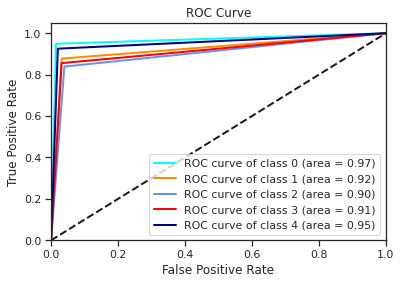

In [7]:
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.metrics import roc_auc_score, roc_curve, auc
n_classes=5

y_pred_bin = label_binarize(y_pred,classes=[0,1,2,3,4])
y_val_bin=label_binarize(y_val,classes=[0,1,2,3,4])

fpr=dict()
tpr=dict()
roc_auc=dict()
for i in range(5):
  fpr[i], tpr[i], _ = roc_curve(y_val_bin[:,i],y_pred_bin[:,i])
  roc_auc[i]= auc(fpr[i],tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_val_bin[:,i],y_pred_bin[:,i])
roc_auc["micro"] = auc(fpr["micro"],tpr["micro"])

lw=2
colors= cycle(['aqua','darkorange','cornflowerblue','red','navy'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


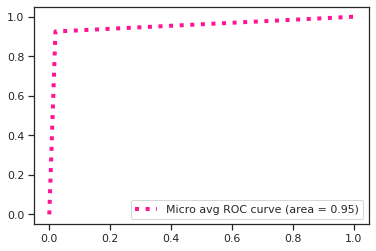

In [8]:
from scipy import interp
all_fpr= np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
          label='Micro avg ROC curve (area = {0:0.2f})'
          ''.format(roc_auc["micro"]), color='deeppink',linestyle=':',linewidth=4)
plt.legend(loc="lower right")
plt.show()

# Inference

From the analyses of fine tuned models, we end up seeing **SVM** able to classify better than **XGBoost**